<img src="piwrf_logo.gif" width="350" align="center">

Pi-WRF is a community driven project to facilitate education/learning related to numerical weather prediction. The [Pi-WRF GitHub](https://github.com/NCAR/pi-wrf) repository contains the necessary components and instructions to both use and contribute to the Pi-WRF project.

In [1]:
import ipywidgets as widgets
import datetime
from  ipyleaflet import (Map, 
                         basemaps,  
                         Marker) 

In [2]:
d = widgets.DatePicker(
    description='Pick a Date',
    disabled=False,
    value=datetime.date.today()
)
display(d)

DatePicker(value=datetime.date(2021, 7, 16), description='Pick a Date')

In [3]:
d.value

datetime.date(2021, 7, 16)

In [4]:
# coordinates default to Boulder, CO
center = [40.0150, -105.2705]
zoom = 2
n = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
marker = Marker(location=center, draggable=True)
n.add_layer(marker);
display(n)

Map(center=[40.015, -105.2705], controls=(ZoomControl(options=['zoom_out_text', 'zoom_in_text', 'zoom_in_title…

In [5]:
print(marker.location)


[40.015, -105.2705]


In [6]:
def round_hour(x, base=6):
    return x // base * base

In [13]:
today = datetime.datetime.today()
now = datetime.datetime.now().time()
step = now
tomorrow = today

now = now.replace(hour = round_hour(now.hour))

start_time = str(today.strftime('%m')) + "-" \
    + str(today.strftime('%d')) + "-" \
    + str(today.year) + "-" \
    + str(now.strftime('%H'))

if now.hour >= 18:
    step = step.replace(hour = 0)
    tomorrow = tomorrow.replace(day = tomorrow.day + 1)
else: 
    step = now.replace(hour = (now.hour + 6))
        
end_time = str(today.strftime('%m')) + "-" \
    + str(tomorrow.strftime('%d')) + "-" \
    + str(today.year) + "-" \
    + step.strftime('%H')

print(start_time)
print(end_time) 
# automated time generation is not working yet; it's currently based on UTC,
# but does not take into account the time zone of the user's selection
# so will tend to error out; for now, you can enter the start_time and end_time manually here
# format: MM-DD-YYYY-HH
# where hour may be 00, 06, 12, or 18
start_time = '07-15-2021-18'
end_time = '07-16-2021-00'
print(start_time)
print(end_time) 

07-16-2021-00
07-16-2021-06
07-15-2021-18
07-16-2021-00


In [14]:
%%bash -s "$start_time" "$end_time"
sed -i /userstartdate=/c\\userstartdate="$1" /pi-wrf/run_wrf
sed -i /userenddate=/c\\userenddate="$2" /pi-wrf/run_wrf

In [15]:
import numpy as np
# gridbox length: 1 lat to 2 lon
gridbox_width=5
gridbox_height=4
#xlim=[-109.03225806, -103.5483871]
#xlim=np.sort(np.array([-109.03225806,-103.5483871]))

xlim=np.sort(np.array([(marker.location[1]-gridbox_width/2),(marker.location[1]+gridbox_width/2)]))
print(xlim)
#ylim=np.sort(np.array([40.69516129,44.53387097]))

ylim=np.sort(np.array([(marker.location[0]-gridbox_height/2),(marker.location[0]+gridbox_height/2)]))
print(ylim)

[-107.7705 -102.7705]
[ 38.015  42.015]


In [16]:
%cd ~/../pi-wrf/pi_wrf/pi_wrf
%pwd
%ls
from set_domain import set_domain
set_domain(xlim, ylim)

/pi-wrf/pi_wrf/pi_wrf
Pages/     __init__.py   calculate_distance.py  map.pkl
Runner.py  __pycache__/  color_schemes.py       set_domain.py


In [17]:
%%bash
cd ~/../pi-wrf/pi_wrf/pi_wrf
../../run_wrf



Parsed 28 entries in GEOGRID.TBL
Processing domain 1 of 1
  Processing XLAT and XLONG
  Processing MAPFAC
  Processing F and E
  Processing ROTANG
  Processing LANDUSEF
  Calculating landmask from LANDUSEF ( WATER =  17  21 )
  Processing HGT_M
  Processing SOILTEMP
  Processing SOILCTOP
  Processing SCT_DOM
  Processing SOILCBOT
  Processing SCB_DOM
  Processing ALBEDO12M
  Processing GREENFRAC
  Processing LAI12M
  Processing SNOALB
  Processing CON
  Processing VAR
  Processing OA1
  Processing OA2
  Processing OA3
  Processing OA4
  Processing OL1
  Processing OL2
  Processing OL3
  Processing OL4

  Optional fields not processed by geogrid:
    VAR_SSO (priority=1, resolution='lowres', path='/pi-wrf/WRF_System/lib/WPS_GEOG/varsso_10m/')
    LAKE_DEPTH (priority=1, resolution='default', path='/pi-wrf/WRF_System/lib/WPS_GEOG/lake_depth/')
    URB_PARAM (priority=1, resolution='default', path='/pi-wrf/WRF_System/lib/WPS_GEOG/NUDAPT44_1km/')
    FRC_URB2D (priority=1, resolution='de

../../run_wrf: line 16: /pi-wrf/Setup/Set_Environment: No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/*.png': No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/*.gif': No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/user_saved_files/*.png': No such file or directory
/bin/rm: cannot remove '/pi-wrf/Output/Temp_WRF_Output': No such file or directory
/bin/rm: cannot remove '/pi-wrf/WRF_System/lib/DATA/*': No such file or directory
../../run_wrf: line 80: /pi-wrf/WRF_System/lib/DATA/: Is a directory
../../run_wrf: line 80: /pi-wrf/WRF_System/lib/DATA/: Is a directory
 Name of source model =>NCEP GFS Analysis       GRID   3
 Name of source model =>NCEP GFS Model          GRID   3
Note: The following floating-point exceptions are signalling: IEEE_OVERFLOW_FLAG IEEE_UNDERFLOW_FLAG


/pi-wrf/Output
total 7984
4008 -rw-r--r-- 1 root root 4102868 Jul 16 03:26 Temp_WRF_Output
  76 -rw-r--r-- 1 root root   76239 Jul 16 03:27 Your_Domain.png
  56 -rw-r--r-- 1 root root   53553 Jul 16 03:27 Your_Domain_Relative.png
 124 -rw-r--r-- 1 root root  125936 Jul 16 03:26 hourly-temperature_00.png
 124 -rw-r--r-- 1 root root  124575 Jul 16 03:26 hourly-temperature_01.png
 124 -rw-r--r-- 1 root root  124694 Jul 16 03:26 hourly-temperature_02.png
 124 -rw-r--r-- 1 root root  124528 Jul 16 03:26 hourly-temperature_03.png
 124 -rw-r--r-- 1 root root  123943 Jul 16 03:26 hourly-temperature_04.png
 124 -rw-r--r-- 1 root root  123954 Jul 16 03:26 hourly-temperature_05.png
 124 -rw-r--r-- 1 root root  125271 Jul 16 03:26 hourly-temperature_06.png
 120 -rw-r--r-- 1 root root  119606 Jul 16 03:27 hourly-wind_00.png
 120 -rw-r--r-- 1 root root  121354 Jul 16 03:27 hourly-wind_01.png
 124 -rw-r--r-- 1 root root  123264 Jul 16 03:27 hourly-wind_02.png
 124 -rw-r--r-- 1 root root  123486 Jul 1

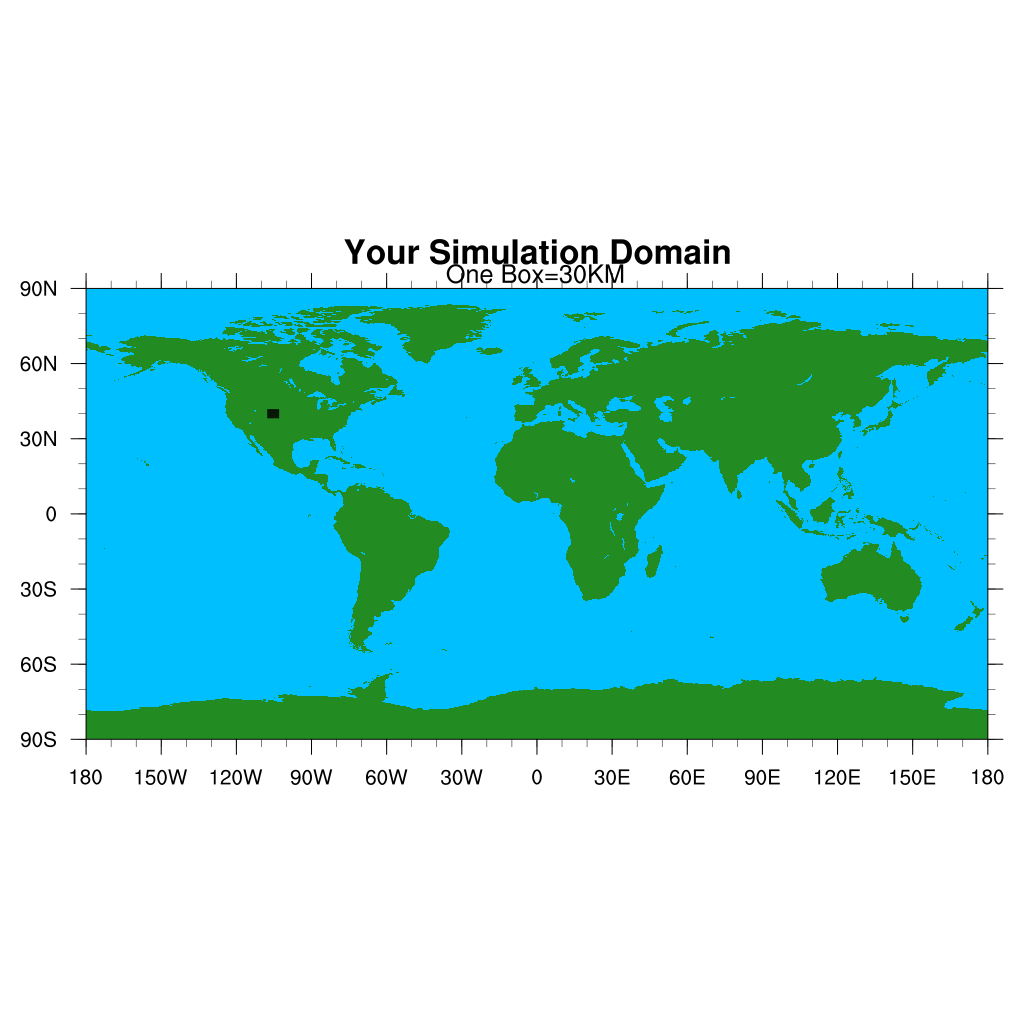

In [18]:
from IPython.display import Image
#Image(filename='test.png') 

%cd ~/../pi-wrf/Output
%pwd
%ls -ls
Image(filename='Your_Domain_Relative.png')

total 7984
4008 -rw-r--r-- 1 root root 4102868 Jul 16 03:26 Temp_WRF_Output
  76 -rw-r--r-- 1 root root   76239 Jul 16 03:27 Your_Domain.png
  56 -rw-r--r-- 1 root root   53553 Jul 16 03:27 Your_Domain_Relative.png
 124 -rw-r--r-- 1 root root  125936 Jul 16 03:26 hourly-temperature_00.png
 124 -rw-r--r-- 1 root root  124575 Jul 16 03:26 hourly-temperature_01.png
 124 -rw-r--r-- 1 root root  124694 Jul 16 03:26 hourly-temperature_02.png
 124 -rw-r--r-- 1 root root  124528 Jul 16 03:26 hourly-temperature_03.png
 124 -rw-r--r-- 1 root root  123943 Jul 16 03:26 hourly-temperature_04.png
 124 -rw-r--r-- 1 root root  123954 Jul 16 03:26 hourly-temperature_05.png
 124 -rw-r--r-- 1 root root  125271 Jul 16 03:26 hourly-temperature_06.png
 120 -rw-r--r-- 1 root root  119606 Jul 16 03:27 hourly-wind_00.png
 120 -rw-r--r-- 1 root root  121354 Jul 16 03:27 hourly-wind_01.png
 124 -rw-r--r-- 1 root root  123264 Jul 16 03:27 hourly-wind_02.png
 124 -rw-r--r-- 1 root root  123486 Jul 16 03:27 hourly-

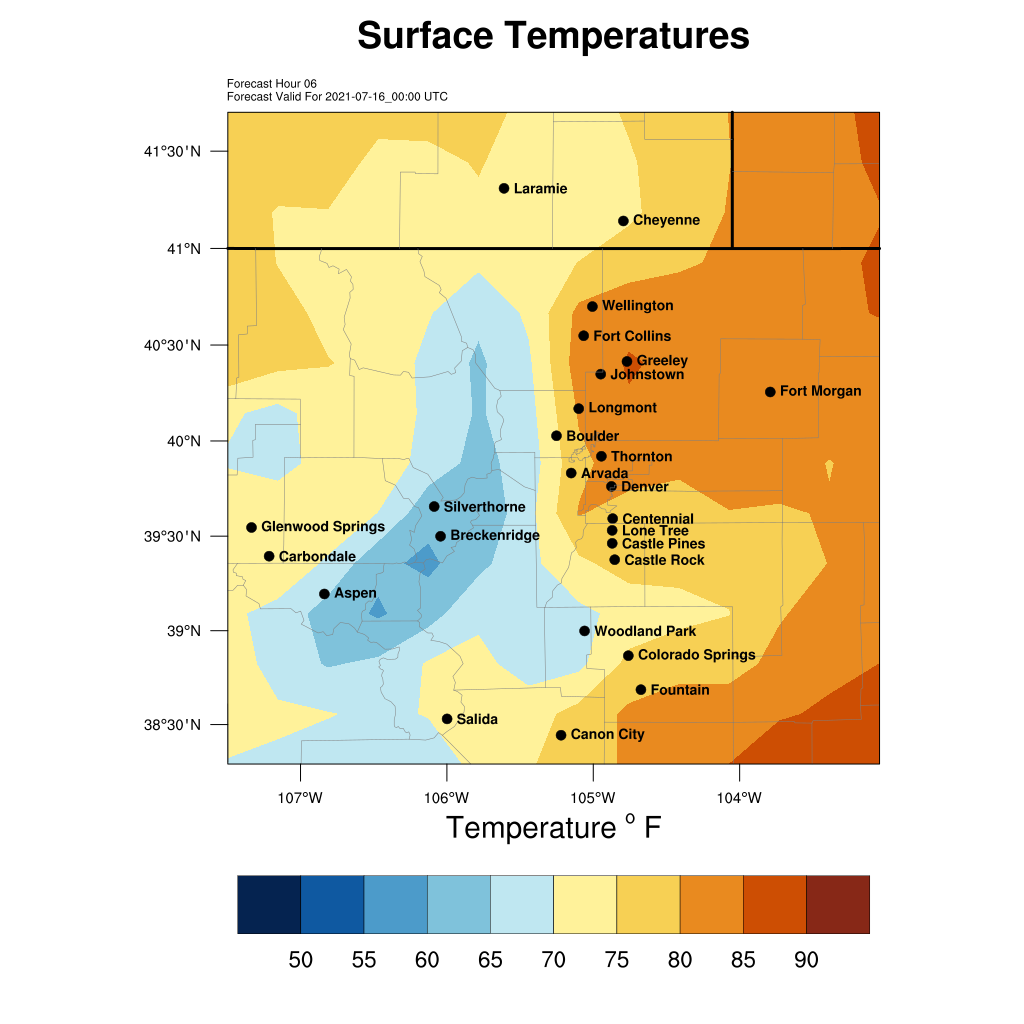

In [19]:
from IPython.display import Image
#Image(filename='test.png') 

#%cd ../../Output
%pwd
%ls -ls
Image(filename='hourly-temperature_06.png')

total 6780
4288 -rw-r--r-- 1 root root 4389616 Jul 15 22:40 Temp_WRF_Output
  52 -rw-r--r-- 1 root root   49645 Jul 15 22:41 Your_Domain.png
  56 -rw-r--r-- 1 root root   53655 Jul 15 22:41 Your_Domain_Relative.png
  80 -rw-r--r-- 1 root root   80182 Jul 15 22:41 hourly-temperature_00.png
  80 -rw-r--r-- 1 root root   80856 Jul 15 22:41 hourly-temperature_01.png
  80 -rw-r--r-- 1 root root   81805 Jul 15 22:41 hourly-temperature_02.png
  80 -rw-r--r-- 1 root root   81718 Jul 15 22:41 hourly-temperature_03.png
  80 -rw-r--r-- 1 root root   81840 Jul 15 22:41 hourly-temperature_04.png
  80 -rw-r--r-- 1 root root   80434 Jul 15 22:41 hourly-temperature_05.png
  80 -rw-r--r-- 1 root root   80561 Jul 15 22:41 hourly-temperature_06.png
  72 -rw-r--r-- 1 root root   73716 Jul 15 22:41 hourly-wind_00.png
  76 -rw-r--r-- 1 root root   75838 Jul 15 22:41 hourly-wind_01.png
  76 -rw-r--r-- 1 root root   75996 Jul 15 22:41 hourly-wind_02.png
  76 -rw-r--r-- 1 root root   77611 Jul 15 22:41 hourly-

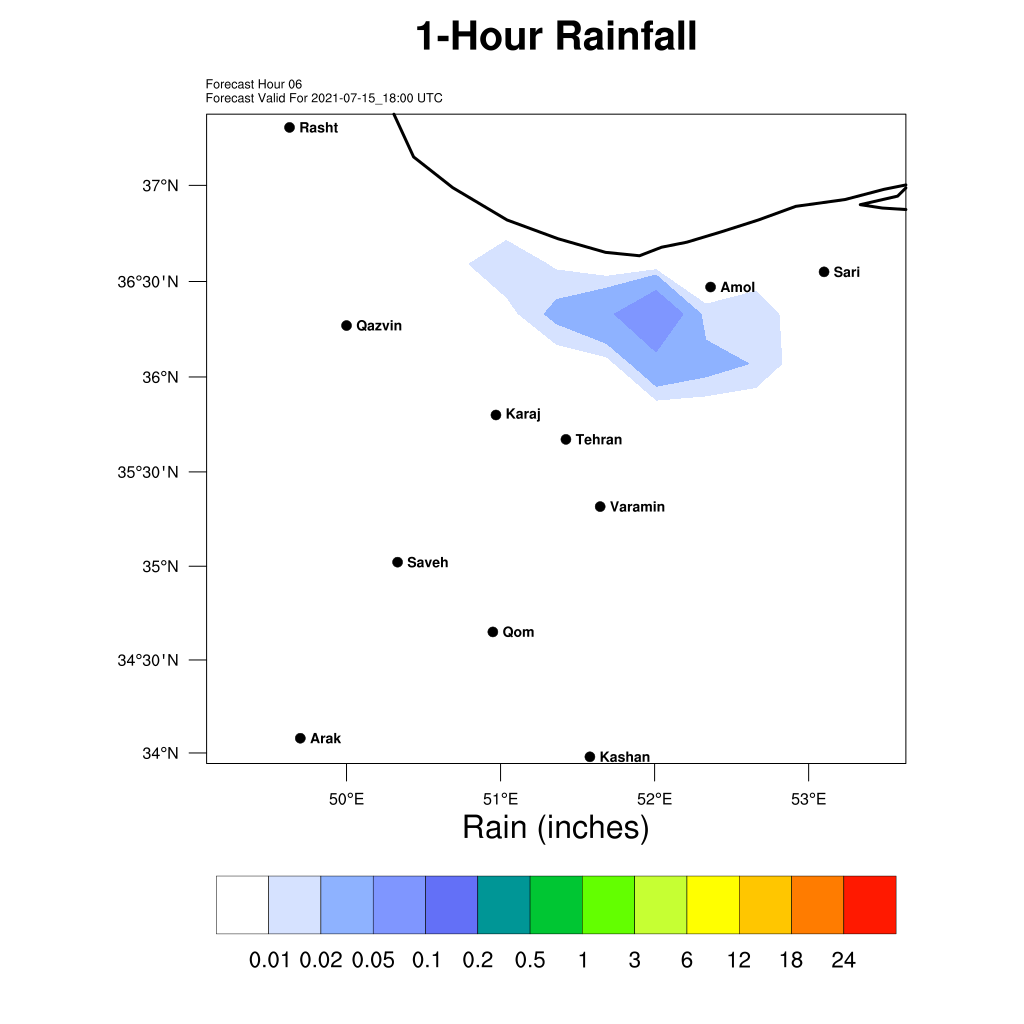

In [53]:
from IPython.display import Image
#Image(filename='test.png') 

#%cd ../../Output
%pwd
%ls -ls
Image(filename='hourly_rain_06.png')